## Hausaufgabe 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [84]:
def dtheta(theta,qab = 0):
    
    rho     = 1000  # kg/m³
    c       = 1000  # J/kgK
    doth    = 1.7e7 # J/sm³
    k       = 561   # K
    t0      = 0
    Tmax    = 100

    return doth*np.exp( -k/theta)/(rho*c) - qab/(rho*c)

def ddtheta(theta):
    
    rho     = 1000  # kg/m³
    c       = 1000  # J/kgK
    doth    = 1.7e7 # J/sm³
    k       = 561   # K
    t0      = 0
    Tmax    = 100

    return k/theta/theta*doth*np.exp(-k/theta)/(rho*c)

<IPython.core.display.Javascript object>


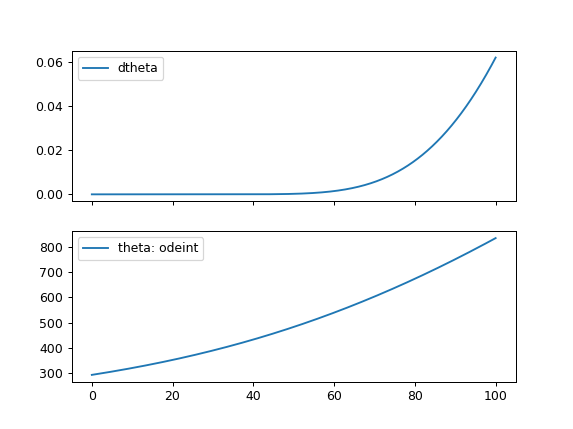

In [80]:
t0 = 0.01
tN = 100
N = 1000


fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
t_fine = np.linspace(t0,tN,1000)
dtheta_fine = dtheta(t_fine)
ax1.plot(t_fine,dtheta_fine,label='dtheta')
ax1.legend()

theta0 = 293
T = np.linspace(t0,tN,N)

resultode = odeint(dtheta,theta0,T)

ax2.plot(T,resultode,label='theta: odeint')
ax2.legend()
plt.show()

<IPython.core.display.Javascript object>


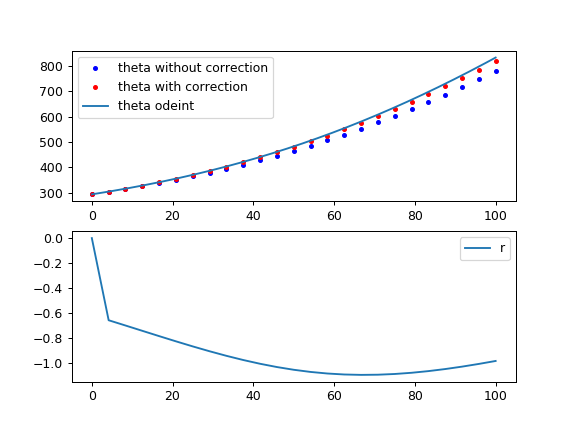

Step  0
r =  -0.655102517691
r =  -0.032572476601
r =  -0.00161933540277
r =  -8.05044835168e-05
Step  1
r =  -0.697054137375
r =  -0.0344176107343
r =  -0.00169907665389
r =  -8.38766674196e-05
Step  2
r =  -0.73940825171
r =  -0.0361539050181
r =  -0.0017673280441
r =  -8.63920511041e-05
Step  3
r =  -0.781685091221
r =  -0.0377395133756
r =  -0.00182148129809
r =  -8.7911675541e-05
Step  4
r =  -0.823352117311
r =  -0.0391329854062
r =  -0.00185924940433
r =  -8.8333324932e-05
Step  5
r =  -0.863837987797
r =  -0.0402954094842
r =  -0.00187884272551
r =  -8.76024967109e-05
Step  6
r =  -0.902550581243
r =  -0.0411926379663
r =  -0.00187912197931
r =  -8.57196966635e-05
Step  7
r =  -0.938898212593
r =  -0.0417973897664
r =  -0.00185970810048
r =  -8.27427471961e-05
Step  8
r =  -0.97231272371
r =  -0.0420910155063
r =  -0.00182103301422
r =  -7.87834855593e-05
Step  9
r =  -1.00227279755
r =  -0.0420647324466
r =  -0.00176432260425
r =  -7.39990992855e-05
Step  10
r =  -1.0283256921

In [118]:
%matplotlib notebook
t0 = 0.01
tN = 100
N = 25
h = (tN-t0)/N

EPSILON = 1e-4
MAX_ITER = 100

t = np.linspace(t0,tN,N)
theta = np.zeros(N)
r_vec = np.zeros(N)
theta[0] = 293

fig3, (ax3,ax4) = plt.subplots(2,1)


for j in range(0,theta.shape[0]-1):
    # prediction
    theta[j+1] = theta[j] + h*dtheta(theta[j])
    # no correction
ax3.plot(t,theta,'b.',label='theta without correction')


for j in range(0,theta.shape[0]-1):
    print("Step ", j)
    # prediction
    theta[j+1] = theta[j] + h*dtheta(theta[j])
    # correction
    r_vec[j+1] =  theta[j+1] - theta[j] - h*dtheta(theta[j+1])
    r = 1
    delta_theta = 1
    n = 1
    while (abs(r) > EPSILON and n < MAX_ITER):
        r = theta[j+1] - theta[j] - h*dtheta(theta[j+1])
        print("r = ",r)
        dfx = ddtheta(theta[j+1])
        delta_theta = -r/(1-dfx)
        theta[j+1] = theta[j+1] + delta_theta
        n = n + 1
ax4.plot(t,r_vec,label="r")
ax4.legend()
ax3.plot(t,theta,'r.',label='theta with correction')
ax3.plot(T,resultode,label='theta odeint')
ax3.legend()
plt.show()